In [472]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
# Reading the file Energy Indicators.xls
energy = pd.read_excel('Energy Indicators.xls',skiprows=17,na_values='...',skip_footer=38,parse_cols=[2,3,4,5,6] 
                       ,names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])

In [3]:
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewables']

In [4]:
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewables
0,Afghanistan,321.0,10.0,78.669280
1,Albania,102.0,35.0,100.000000
2,Algeria,1959.0,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.0,121.0,88.695650


In [5]:
energy.tail()

,Country,Energy Supply,Energy Supply per Capita,% Renewables
222,Viet Nam,2554.0,28.0,45.32152
223,Wallis and Futuna Islands,0.0,26.0,0.00000
224,Yemen,344.0,13.0,0.00000
225,Zambia,400.0,26.0,99.71467
226,Zimbabwe,480.0,32.0,52.53612


In [6]:
energy.shape

(227, 4)

In [7]:
energy['Energy Supply'] = energy['Energy Supply'] * 1000000

In [8]:
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewables
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650


In [9]:
energy = energy.reset_index()

In [10]:
energy['Country_M'] = energy['Country']

In [11]:
energy = energy.set_index('Country')

In [12]:
energy.set_value('Republic of Korea','Country_M','South Korea')
energy.set_value('United States of America','Country_M','United States')
energy.set_value('United Kingdom of Great Britain and Northern Ireland','Country_M','United Kingdom')
energy.set_value('China, Hong Kong Special Administrative Region','Country_M','Hong Kong')
energy.head(5)

,index,Energy Supply,Energy Supply per Capita,% Renewables,Country_M
Country,,,,,
Afghanistan,0.0,3.210000e+08,10.0,78.669280,Afghanistan
Albania,1.0,1.020000e+08,35.0,100.000000,Albania
Algeria,2.0,1.959000e+09,51.0,0.551010,Algeria
American Samoa,3.0,NaN,NaN,0.641026,American Samoa
Andorra,4.0,9.000000e+06,121.0,88.695650,Andorra


In [13]:
# checking the Country_M column to see if the change got reflected
energy.loc['Republic of Korea']

index                               164
Energy Supply                1.1007e+10
Energy Supply per Capita            221
% Renewables                    2.27935
Country_M                   South Korea
Name: Republic of Korea, dtype: object

In [14]:
# removing () from Country names
for names in energy.index:
    if names.find('(') > -1 or names.find(')') >-1:
        #print(names[:names.find('(')])
        energy.set_value(names,'Country_M',names[:names.find('(')])

In [ ]:
# importing world_bank data
GDP = pd.read_csv('world_bank.csv',skiprows=4)

In [ ]:
GDP.head()

In [ ]:
GDP.columns

In [ ]:
GDP['Country_M'] = GDP['Country Name']
GDP = GDP.set_index('Country Name')

In [ ]:
GDP.head()

In [ ]:
GDP.set_value('Korea, Rep.','Country_M','South Korea')
GDP.set_value('Iran, Islamic Rep.','Country_M','Iran')
GDP.set_value('Hong Kong SAR, China','Country_M','Hong Kong')

In [ ]:
GDP.reset_index(drop=True,inplace=True)

In [ ]:
GDP.columns = ['Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       'Country']

In [ ]:
GDP.head()

In [ ]:
ScimEn = pd.read_excel('scimagojr.xlsx')

In [ ]:
ScimEn.head()

In [ ]:
GDP_col_needed = list(np.arange(2006,2016,1))
GDP_col_needed = list(map(str,GDP_col_needed))
GDP_col_needed.append('Country')
GDP_col_needed

In [ ]:
GDP_DF2 = GDP[GDP_col_needed]
GDP_DF2.head(5)

In [ ]:
energy.head(2)

In [ ]:
ScimEn.head(2)

In [ ]:
GDP_DF2.head(2)

In [ ]:
GDP_final = GDP_DF2

In [ ]:
GDP_final.shape

In [ ]:
sci_Condi = (ScimEn.Rank >= 0) & (ScimEn.Rank <= 15)

In [ ]:
sci_Condi_final = ScimEn[sci_Condi]

In [ ]:
sci_Condi_final.shape

In [ ]:
energy_gdp_df = pd.merge(energy,GDP_final,how='inner',left_on='Country',right_on='Country',copy=True)

In [ ]:
energy_gdp_df.shape

In [ ]:
energy_gdp_df.head(2)

In [ ]:
final_df = pd.merge(energy_gdp_df,sci_Condi_final,how='inner',left_on='Country',right_on='Country',copy=True)

In [ ]:
final_df.shape

In [ ]:
final_df

In [ ]:
energy.columns

In [ ]:
GDP_final.columns

In [ ]:
sci_Condi_final.columns

In [294]:
def energy():
    energy = pd.read_excel('Energy Indicators.xls',skiprows=17,na_values='...',skip_footer=38,parse_cols=[2,3,4,5,6] 
                       ,names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy['Energy Supply'] = energy['Energy Supply'] * 1000000
    dicts = {'Republic of Korea': 'South Korea',
               'United States of America': 'United States',
               'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
               'China, Hong Kong Special Administrative Region': 'Hong Kong'}
    energy['Country_M'] = energy['Country']
    energy = energy.set_index('Country')
    
    for country in energy.index:
        if (country.endswith(('1','2','3','4','5','6','7','8','9','0'))):
            country_edit = country[:-1]
            energy.set_value(country,'Country_M',country_edit)
            if (country_edit.endswith(('1','2','3','4','5','6','7','8','9','0'))):
                country_edit = country_edit[:-1]
                #print(country_edit)
                energy.set_value(country,'Country_M',country_edit)
    
    energy['Country_E'] = energy['Country_M']
    energy = energy.set_index('Country_M')
    #print(energy.columns)
    
    for country in energy.index:
        for key,value in dicts.items():
            #print('country>>>>',country)
            #print('key>>>>',key)
            if (key==country):
                energy.set_value(key,'Country_E',value)
        
    # removing () from Country names
    for names in energy.index:
        if names.find('(') > -1 or names.find(')') >-1:
            #print(names[:names.find('(')])
            energy.set_value(names,'Country_E',names[:names.find('(')].strip())
    energy.reset_index(drop=True,inplace=True)
    energy.columns = ['Energy Supply', 'Energy Supply per Capita', '% Renewable','Country']
    return energy

In [295]:
energy_df = energy()

In [296]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 4 columns):
Energy Supply               222 non-null float64
Energy Supply per Capita    222 non-null float64
% Renewable                 227 non-null float64
Country                     227 non-null object
dtypes: float64(3), object(1)
memory usage: 7.2+ KB


In [297]:
def gdp():
    GDP = pd.read_csv('world_bank.csv',skiprows=4)
    dicts = {'Korea, Rep.': 'South Korea', 
           'Iran, Islamic Rep.': 'Iran',
           'Hong Kong SAR, China': 'Hong Kong'}
    GDP['Country_M'] = GDP['Country Name']
    GDP = GDP.set_index('Country Name')
    for country in GDP.index:
        for key,value in dicts.items():
            if(country==key):
                GDP.set_value(country,'Country_M',value)
    GDP.reset_index(drop=True,inplace=True)
    GDP.columns = ['Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961',
           '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
           '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
           '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
           '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
           '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
           '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
           'Country']
    GDP_col_needed = list(np.arange(2006,2016,1))
    GDP_col_needed = list(map(str,GDP_col_needed))
    GDP_col_needed.append('Country')
    GDP_DF2 = GDP[GDP_col_needed]
    return GDP_DF2

In [298]:
GDP_df = gdp()

In [299]:
GDP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 11 columns):
2006       237 non-null float64
2007       237 non-null float64
2008       238 non-null float64
2009       238 non-null float64
2010       243 non-null float64
2011       238 non-null float64
2012       237 non-null float64
2013       237 non-null float64
2014       230 non-null float64
2015       214 non-null float64
Country    264 non-null object
dtypes: float64(10), object(1)
memory usage: 22.8+ KB


In [300]:
GDP_df.iloc[[0,-1]]

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Country
0,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN,Aruba
263,1.006276e+10,9.695130e+09,7.982103e+09,8.459783e+09,9.422161e+09,1.054391e+10,1.165789e+10,1.218064e+10,1.264939e+10,1.278517e+10,Zimbabwe


In [301]:
def scimen():
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    return ScimEn

In [302]:
ScimEn_df = scimen()

In [303]:
ScimEn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 8 columns):
Rank                      191 non-null int64
Country                   191 non-null object
Documents                 191 non-null int64
Citable documents         191 non-null int64
Citations                 191 non-null int64
Self-citations            191 non-null int64
Citations per document    191 non-null float64
H index                   191 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 12.0+ KB


In [304]:
ScimEn_df.iloc[[0,-1]]

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.7,138
190,191,Mauritania,1,1,1,0,1.0,1


## Question-1:

In [305]:
def answer_one():
    energy_df, GDP_df, ScimEn_df = energy(),gdp(),scimen()
    tdf = pd.merge(energy_df,GDP_df,how='inner',left_on='Country',right_on='Country')
    tdf = pd.merge(tdf,ScimEn_df,how='inner',left_on='Country',right_on='Country')
    condition_mask = tdf['Rank'] <= 15
    res = tdf[condition_mask]
    res = res.set_index('Country')
    return res

In [306]:
a = answer_one()

In [307]:
a.shape

(15, 20)

## Question-2:

In [309]:
def answer_two():
    energy_df, GDP_df, ScimEn_df = energy(),gdp(),scimen()
    tdf_in = pd.merge(energy_df,GDP_df,how='inner',left_on='Country',right_on='Country')
    tdf_in = pd.merge(tdf_in,ScimEn_df,how='inner',left_on='Country',right_on='Country')
    tdf_out = pd.merge(energy_df,GDP_df,how='outer',left_on='Country',right_on='Country')
    tdf_out = pd.merge(tdf_out,ScimEn_df,how='outer',left_on='Country',right_on='Country')
    diff_count = len(tdf_out) - len(tdf_in)
    return diff_count

In [310]:
b = answer_two()

In [311]:
b

156

## Question-3:

In [215]:
q3_df = gdp().copy()

In [216]:
q3_df = q3_df.set_index('Country')

In [217]:
q3_df

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
Arab World,1.763824e+12,1.863481e+12,1.980983e+12,2.011001e+12,2.103825e+12,2.173896e+12,2.318267e+12,2.385580e+12,2.436659e+12,2.509068e+12
United Arab Emirates,2.789489e+11,2.878318e+11,2.970189e+11,2.814464e+11,2.860493e+11,3.009462e+11,3.216922e+11,3.355937e+11,3.509313e+11,3.621003e+11
Argentina,3.788140e+11,4.089887e+11,4.215649e+11,4.217758e+11,4.616402e+11,5.003555e+11,5.043671e+11,5.189199e+11,5.212737e+11,NaN
Armenia,8.679746e+09,9.873142e+09,1.055439e+10,9.060944e+09,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.111236e+10,1.144574e+10


In [218]:
cols = q3_df.columns

In [219]:
cols

Index(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object')

In [221]:
a = lambda x: np.mean(x)

In [227]:
country_mean = q3_df.apply(a,axis=1)

In [228]:
country_mean

Country
Aruba                                                2.467704e+09
Andorra                                              3.504957e+09
Afghanistan                                          1.610842e+10
Angola                                               8.412116e+10
Albania                                              1.177673e+10
Arab World                                           2.154659e+12
United Arab Emirates                                 3.102559e+11
Argentina                                            4.597444e+11
Armenia                                              1.008123e+10
American Samoa                                                NaN
Antigua and Barbuda                                  1.230559e+09
Australia                                            1.164043e+12
Austria                                              3.969561e+11
Azerbaijan                                           5.060765e+10
Burundi                                              2.073331e+09
Be

In [229]:
type(country_mean)

pandas.core.series.Series

In [234]:
result = country_mean.sort_values(ascending=False)[0:16]

In [235]:
result

Country
World                        6.713548e+13
High income                  4.586468e+13
OECD members                 4.514723e+13
Post-demographic dividend    4.292131e+13
IDA & IBRD total             2.202600e+13
Europe & Central Asia        2.117122e+13
Low & middle income          2.081219e+13
Middle income                2.051324e+13
IBRD only                    2.039738e+13
European Union               1.717367e+13
East Asia & Pacific          1.714490e+13
North America                1.703064e+13
Upper middle income          1.576611e+13
United States                1.536434e+13
Late-demographic dividend    1.389504e+13
Euro area                    1.275159e+13
dtype: float64

In [312]:
def answer_three():
    Top15 = answer_one().copy()
    col_selected = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
    Top15 = Top15[col_selected]
    result = Top15.apply(lambda x: np.mean(x),axis=1)
    result = result.sort_values(ascending=False)
    return result

In [313]:
Q3 = answer_three()

In [314]:
Q3

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

## Question-4:

In [654]:
def answer_four():
    Top15 = answer_one().copy()
    Top15 = Top15[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    Top15['Avg_GDP'] = Top15.apply(np.mean,axis=1)
    Top15.sort_values(by='Avg_GDP',ascending=False,inplace=True)
    res_series = Top15.iloc[5]
    result = res_series.loc['2015'] - res_series.loc['2006']
    return result

In [655]:
Q4 = answer_four()


In [658]:
Q4

246702696075.3999

## Question-5:

In [327]:
def answer_five():
    Top15 = answer_one()
    mean_perCapita = np.mean(Top15['Energy Supply per Capita'],axis=0)
    return mean_perCapita

In [328]:
Q5 = answer_five()

In [329]:
Q5

157.6

## Question-6:

In [340]:
def answer_six():
    Top15 = answer_one()
    return (Top15['% Renewable'].idxmax(),Top15['% Renewable'].max())

In [341]:
q6 = answer_six()
q6

('Brazil', 69.648030000000006)

In [333]:
np.max(q6['% Renewable'],axis=0)

69.648030000000006

In [339]:
(q6['% Renewable'].idxmax(),q6['% Renewable'].max())

('Brazil', 69.648030000000006)

## Question-7

In [402]:
def answer_seven():
    Top15 = answer_one().copy()
    Top15 = Top15[['Citations','Self-citations']]
    Top15['Ration_Citation'] = np.divide(Top15['Self-citations'],Top15['Citations'])
    ans = (Top15['Ration_Citation'].idxmax(), Top15['Ration_Citation'].max())
    return ans

In [403]:
q7 = answer_seven()

In [404]:
q7


('China', 0.68931261793894216)

## Question-8

In [444]:
def answer_eight():
    Top15 = answer_one().copy()
    Top15['Population'] = np.divide(Top15['Energy Supply'],Top15['Energy Supply per Capita'])
    Pop_Sorted = Top15['Population'].sort_values(ascending=False)
    return Pop_Sorted.index[2]

In [445]:
q8 = answer_eight()

In [446]:
q8

Country
China                 1.367645e+09
India                 1.276731e+09
United States         3.176154e+08
Brazil                2.059153e+08
Russian Federation    1.435000e+08
Japan                 1.274094e+08
Germany               8.036970e+07
Iran                  7.707563e+07
United Kingdom        6.387097e+07
France                6.383735e+07
Italy                 5.990826e+07
South Korea           4.980543e+07
Spain                 4.644340e+07
Canada                3.523986e+07
Australia             2.331602e+07
Name: Population, dtype: float64

## Question-9

In [677]:
def answer_nine():
    Top15 = answer_one().copy()
    Top15['Population'] = np.divide(Top15['Energy Supply'],Top15['Energy Supply per Capita'])
    Top15['Citable_Doc_Per_Capita'] = np.divide(Top15['Citable documents'],Top15['Population'])
    Top15 = Top15[['Energy Supply per Capita','Citable_Doc_Per_Capita']]
    cor_value = Top15.corr()
    result = cor_value.iloc[1][0]
    return result

In [678]:
q9 = answer_nine()

In [679]:
q9

0.79400104354429435

In [470]:
def plot9():    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

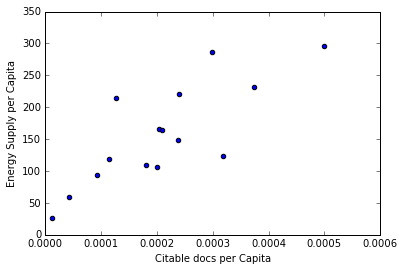

In [471]:
plot9()

## Question-10

In [541]:
def answer_ten():
    Top15 = answer_one()
    renew_mean = Top15['% Renewable'].mean()
    def funct1(x):
        if x['% Renewable'] >= renew_mean:
            return 1
        else:
            return 0
    Top15['New_Col'] = Top15.apply(funct1,axis=1)
    Top15 = Top15.sort_values(by='Rank')
    return Top15['New_Col']

In [542]:
q10 = answer_ten()

In [543]:
q10.head(3)

Country
China            0
United States    0
Japan            0
Name: New_Col, dtype: int64

## Question-11

In [613]:
def answer_eleven():
    Top15 = answer_one().copy()
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    df_q11 = pd.Series(ContinentDict)
    df = pd.concat((Top15,df_q11),join='inner',axis=1)
    df=df.reset_index('Continent')
    df.columns = [                  'Country',            'Energy Supply',
                   'Energy Supply per Capita',              '% Renewable',
                                       '2006',                     '2007',
                                       '2008',                     '2009',
                                       '2010',                     '2011',
                                       '2012',                     '2013',
                                       '2014',                     '2015',
                                       'Rank',                'Documents',
                          'Citable documents',                'Citations',
                             'Self-citations',   'Citations per document',
                                    'H index',                'Continent']
    df = df.set_index('Continent')
    df['Population'] = np.divide(df['Energy Supply'],df['Energy Supply per Capita'])
    df_final = df[['Country','Population']].copy()
    res = df_final.groupby(level=0)['Population'].agg({'size':np.count_nonzero,'sum': np.sum,'avg': np.average,'std': np.std})
    return res

In [614]:
q11 = answer_eleven()

In [615]:
q11

,std,avg,size,sum
Continent,,,,
Asia,6.790979e+08,5.797333e+08,5.0,2.898666e+09
Australia,NaN,2.331602e+07,1.0,2.331602e+07
Europe,3.464767e+07,7.632161e+07,6.0,4.579297e+08
North America,1.996696e+08,1.764276e+08,2.0,3.528552e+08
South America,NaN,2.059153e+08,1.0,2.059153e+08


In [616]:
sdf = np.array(12)

In [619]:
sdf

array(12)

## Question-12

In [716]:
def answer_twelve():
    Top15 = answer_one().copy()
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    df_q11 = pd.Series(ContinentDict)
    df = pd.concat((Top15,df_q11),join='inner',axis=1)
    df=df.reset_index('Continent')
    df.columns = [                  'Country',            'Energy Supply',
                   'Energy Supply per Capita',              '% Renewable',
                                       '2006',                     '2007',
                                       '2008',                     '2009',
                                       '2010',                     '2011',
                                       '2012',                     '2013',
                                       '2014',                     '2015',
                                       'Rank',                'Documents',
                          'Citable documents',                'Citations',
                             'Self-citations',   'Citations per document',
                                    'H index',                'Continent']

    df['Binned'] = pd.cut(df['% Renewable'],5)
    df = df[['Country','Continent','Binned']]
    df.set_index(['Continent','Binned'],inplace=True)
    #result = df['Country']
    return df

In [717]:
q12 = answer_twelve()

In [720]:
q12

Country
Continent     Binned                              
Australia     (2.212, 15.753]            Australia
South America (56.174, 69.648]              Brazil
North America (56.174, 69.648]              Canada
Asia          (15.753, 29.227]               China
Europe        (15.753, 29.227]              France
              (15.753, 29.227]             Germany
Asia          (2.212, 15.753]                India
              (2.212, 15.753]                 Iran
Europe        (29.227, 42.701]               Italy
Asia          (2.212, 15.753]                Japan
Europe        (15.753, 29.227]  Russian Federation
Asia          (2.212, 15.753]          South Korea
Europe        (29.227, 42.701]               Spain
              (2.212, 15.753]       United Kingdom
North America (2.212, 15.753]        United States